In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
raw_data = pd.read_csv("Sources Files/bitcoin_2010-07-27_2024-04-25.csv")
# raw_data

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-04-24,2024-04-25,66553.5400,67070.4000,63742.7300,64291.0700,1.384736e+11,1.294489e+12
1,2024-04-23,2024-04-24,66761.0200,67174.0200,65884.1500,66386.6100,1.408621e+11,1.308576e+12
2,2024-04-22,2024-04-23,64952.0200,67180.0300,64598.0000,66818.8900,1.400725e+11,1.299703e+12
3,2024-04-21,2024-04-22,64875.7500,65638.7400,64302.4700,64896.8700,1.326574e+11,1.278730e+12
4,2024-04-20,2024-04-21,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11,1.263725e+12
...,...,...,...,...,...,...,...,...
5016,2010-07-31,2010-08-01,0.0679,0.0679,0.0679,0.0679,0.000000e+00,0.000000e+00
5017,2010-07-30,2010-07-31,0.0627,0.0627,0.0627,0.0627,0.000000e+00,0.000000e+00
5018,2010-07-29,2010-07-30,0.0699,0.0699,0.0699,0.0699,0.000000e+00,0.000000e+00
5019,2010-07-28,2010-07-29,0.0589,0.0589,0.0589,0.0589,0.000000e+00,0.000000e+00


In [3]:
df = raw_data.iloc[::-1]
df = df.reset_index()
features = df.columns[1:8]
features = features.drop("End",True)
df = df[features]
df

,Start,Open,High,Low,Close,Volume
0,2010-07-27,0.0600,0.0600,0.0600,0.0600,0.000000e+00
1,2010-07-28,0.0589,0.0589,0.0589,0.0589,0.000000e+00
2,2010-07-29,0.0699,0.0699,0.0699,0.0699,0.000000e+00
3,2010-07-30,0.0627,0.0627,0.0627,0.0627,0.000000e+00
4,2010-07-31,0.0679,0.0679,0.0679,0.0679,0.000000e+00
...,...,...,...,...,...,...
5016,2024-04-20,63824.0600,65351.3300,63321.1900,64857.9900,1.537410e+11
5017,2024-04-21,64875.7500,65638.7400,64302.4700,64896.8700,1.326574e+11
5018,2024-04-22,64952.0200,67180.0300,64598.0000,66818.8900,1.400725e+11
5019,2024-04-23,66761.0200,67174.0200,65884.1500,66386.6100,1.408621e+11


In [4]:
temp = []
for i in df['Start']:
    temp.append(pd.to_datetime(i).year)
df['Year']=temp

<Axes: ylabel='Frequency'>

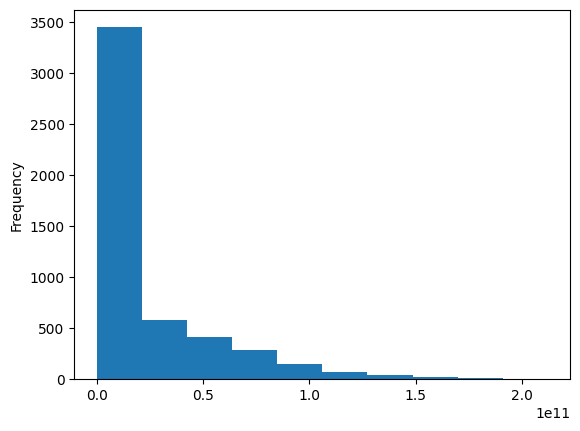

In [5]:
t = df['Volume']
t.plot(kind='hist')


In [6]:
df = df.drop(index = df[df['Volume'] == 0].index)
df = df.reset_index()
df['Tok'] = df['Volume'] / ((df['High'] + df['Low']) / 2)
# df.to_csv('delete.csv')
int(df['Tok'].max()  - df['Tok'].min())

12973864

### Showing Dist of volumes after removing 0 Values grouping by mean of volumes depending on the year index

Text(0.5, 1.0, 'Tok Dist')

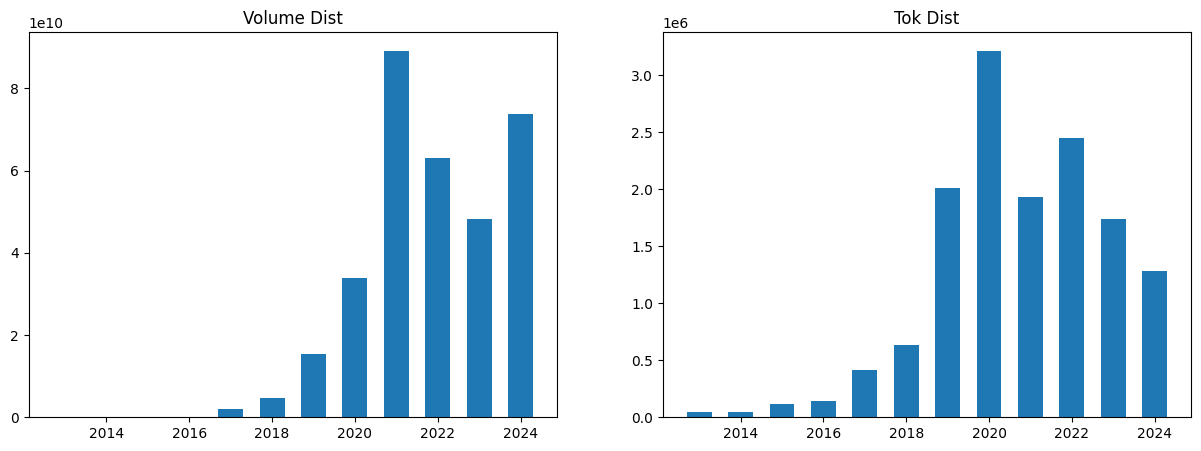

In [7]:
G_mean1 = df.groupby(df['Year'])['Volume']
G_mean1 = G_mean1.mean()

Gmean2 = df.groupby(df['Year'])['Tok']
Gmean2 = Gmean2.mean()

# mean1.plot(kind = 'bar')

fig, (ax0,ax1) = plt.subplots(1,2,figsize = (15,5))

ax0.bar(x = range(2013,2025),height=G_mean1.values ,width = 0.6,data = G_mean1)
ax0.set_title("Volume Dist")
ax1.bar(x = range(2013,2025),height=Gmean2.values ,width = 0.6,data = Gmean2)
ax1.set_title("Tok Dist")

### Remember Tok is the number of trading per day because it is equal to (volume / price) for each day.....it is for smalling the defrence

### Finding the defrence between the first of the year and the end of the year

<Axes: xlabel='Year'>

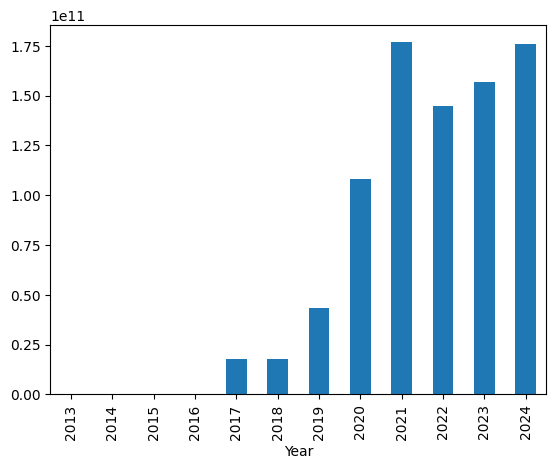

In [8]:
arr_def = pd.DataFrame([])
defference = df.groupby(df['Year'])['Volume']
arr_def['Deff'] = defference.max() -defference.min() 

arr_def['Deff'].plot(kind='bar')


### show the scatter for 2024 change in Volumes

Text(0.5, 1.0, 'Volume During 2024 01/1 -> 24/4')

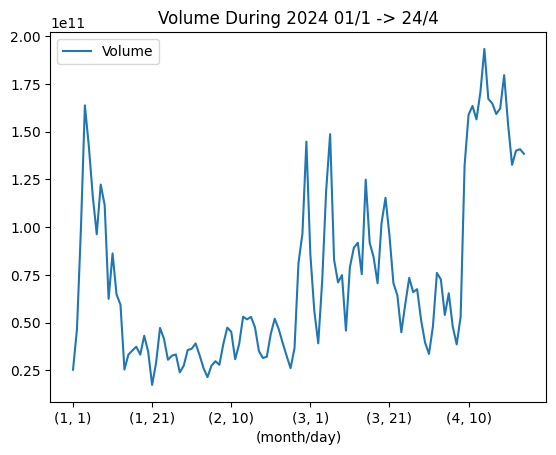

In [9]:
ind = df[df['Year'] == 2024].index
temp = pd.DataFrame(df[['Start','Volume']],index = ind)
temp['Start'] = [(pd.to_datetime(i).month,pd.to_datetime(i).day) for i in temp['Start']]

temp.plot(kind = 'line', y='Volume', x='Start')
plt.xlabel("(month/day)")
plt.title("Volume During 2024 01/1 -> 24/4")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   3772 non-null   int64  
 1   Start   3772 non-null   object 
 2   Open    3772 non-null   float64
 3   High    3772 non-null   float64
 4   Low     3772 non-null   float64
 5   Close   3772 non-null   float64
 6   Volume  3772 non-null   float64
 7   Year    3772 non-null   int64  
 8   Tok     3772 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 265.3+ KB


In [18]:
df = df[['Start', 'High', 'Low', 'Volume']]

In [21]:
BTC = df
BTC.to_csv('Scripts out/BTC.csv',index=0)

In [13]:
ADA = pd.read_csv("Sources Files/OHLCV_Binance_ADA-USDT_D20180417T040200UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))
BNB = pd.read_csv("Sources Files/OHLCV_Binance_BNB-USDT_D20171106T035400UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))
ETH = pd.read_csv("Sources Files/OHLCV_Binance_ETH-USDT_D20170817T040000UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))
SOL = pd.read_csv("Sources Files/OHLCV_Binance_SOL-USDT_D20200811T060000UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))
XRP = pd.read_csv("Sources Files/OHLCV_Binance_XRP-USDT_D20180504T081100UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))

C:\Users\hussam\AppData\Local\Temp\ipykernel_9496\62389784.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  ADA = pd.read_csv("Sources Files/OHLCV_Binance_ADA-USDT_D20180417T040200UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))
C:\Users\hussam\AppData\Local\Temp\ipykernel_9496\62389784.py:1: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  ADA = pd.read_csv("Sources Files/OHLCV_Binance_ADA-USDT_D20180417T040200UTC-D20240404T115959UTC_1min.csv",parse_dates=['timestamp'], date_parser=lambda x:pd.to_datetime(x,unit='s'))
C:

### here to make the stuff simple i take the mean value of the price in whole the days and exporting the result

In [22]:
for i,s in zip([ADA, BNB, ETH, SOL, XRP, ],['ADA', 'BNB', 'ETH', 'SOL', 'XRP']):

